# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ruster import Ruster
import sys
import os

color_1 = "salmon"
color_2 = "deepskyblue"
color_3 = "lightgreen"

r = Ruster(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\debug\\PerceptronLib.dll")

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [3]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      1,
      -1
])

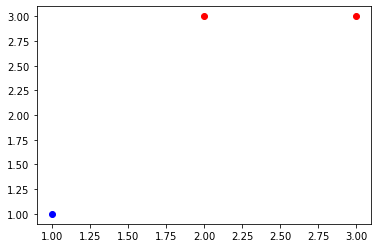

<Figure size 432x288 with 0 Axes>

In [337]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

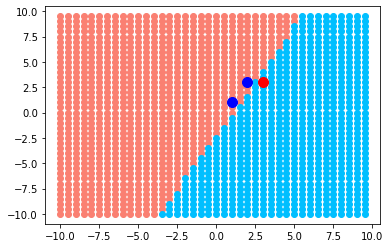

In [357]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 3
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 200, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(-10.0, 10.0, 0.5):
    for j in np.arange(-10.0, 10.0, 0.5):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter([p[0] for p in X[:2]], [p[1] for p in X[:2]], c='blue', s=100)
plt.scatter([p[0] for p in X[2:]], [p[1] for p in X[2:]], c='red', s=100)
plt.show()

r.release_nn(nn)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [329]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

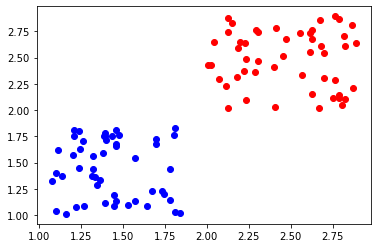

<Figure size 432x288 with 0 Axes>

In [330]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

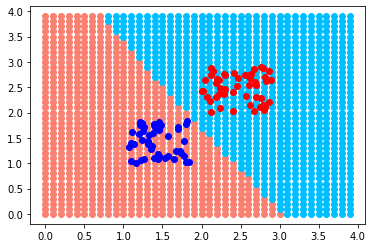

In [334]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 3
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 200, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(0.0, 4.0, 0.1):
    for j in np.arange(0.0, 4.0, 0.1):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

r.release_nn(nn)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [316]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

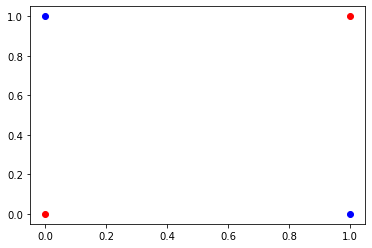

<Figure size 432x288 with 0 Axes>

In [317]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

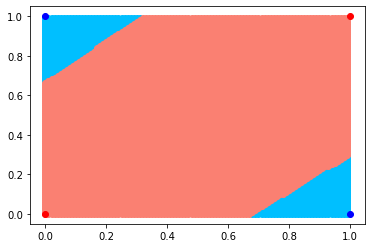

In [327]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 3
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 200, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(0.0, 1.0, 0.01):
    for j in np.arange(0.0, 1.0, 0.01):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

r.release_nn(nn)

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [358]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

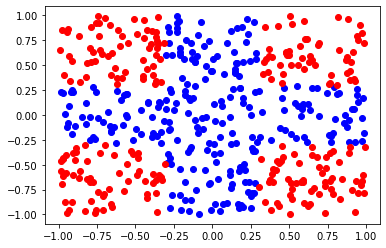

<Figure size 432x288 with 0 Axes>

In [359]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

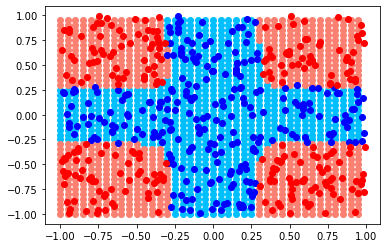

In [381]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 5
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 500, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(-1.0, 1.0, 0.05):
    for j in np.arange(-1.0, 1.0, 0.05):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()

r.release_nn(nn)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [11]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])
X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

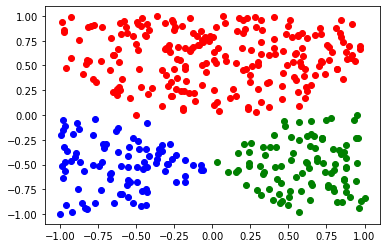

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

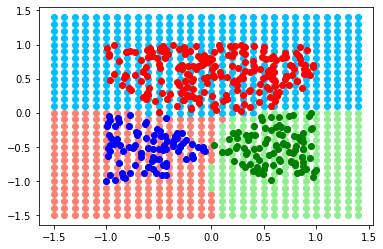

In [16]:
def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count
    
            
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 3
input_count = 2
hidden_count = 8
output_count = 3

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 500, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
points_x1_green = []
points_x2_green = []
for i in np.arange(-1.5, 1.5, 0.1):
    for j in np.arange(-1.5, 1.5, 0.1):
        value = r.predict_nn(nn, np.array([i, j], float), True, output_count).tolist()
#         print(value)
        idx = index(value)
#         print(idx)
        if idx == 0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif idx == 1:
            points_x1_red.append(i)
            points_x2_red.append(j)
        elif idx == 2:
            points_x1_green.append(i)
            points_x2_green.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(points_x1_green, points_x2_green, c=color_3)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()

r.release_nn(nn)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [17]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

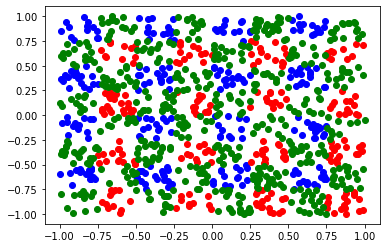

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

_


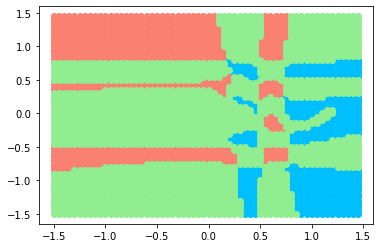

In [19]:
def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count
    
            
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 5
input_count = 2
hidden_count = 8
output_count = 3

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

print("_")
r.train_nn(nn, XF, YF, 1000, 0.01, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
points_x1_green = []
points_x2_green = []
for i in np.arange(-1.5, 1.5, 0.05):
    for j in np.arange(-1.5, 1.5, 0.05):
        value = r.predict_nn(nn, np.array([i, j], float), True, output_count).tolist()
#         print(value)
        idx = index(value)
#         print(idx)
        if idx == 0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif idx == 1:
            points_x1_red.append(i)
            points_x2_red.append(j)
        elif idx == 2:
            points_x1_green.append(i)
            points_x2_green.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(points_x1_green, points_x2_green, c=color_3)
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()

r.release_nn(nn)

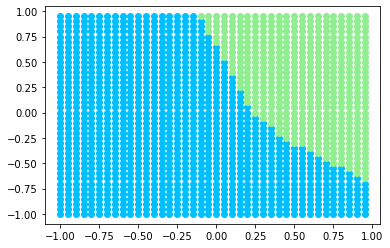

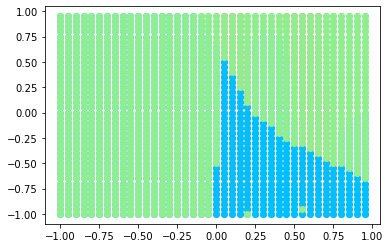

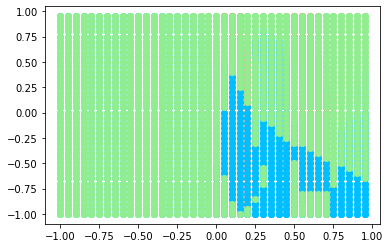

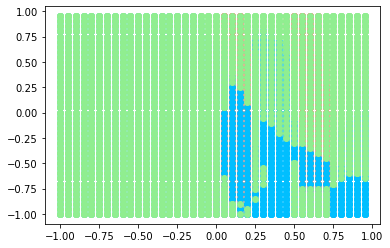

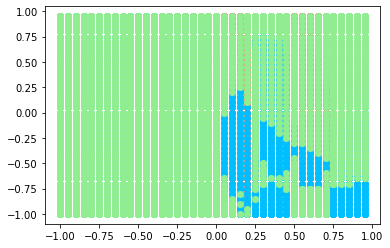

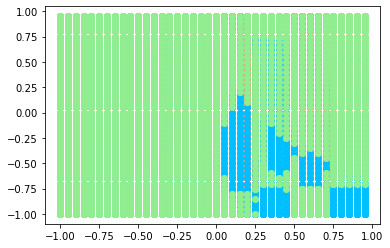

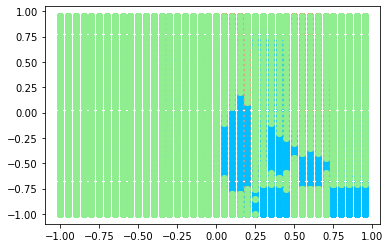

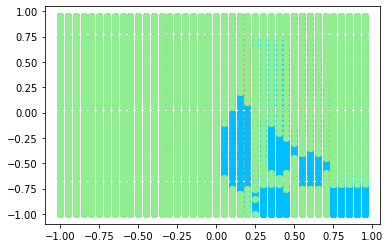

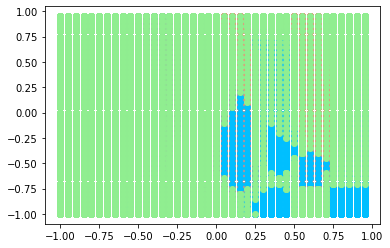

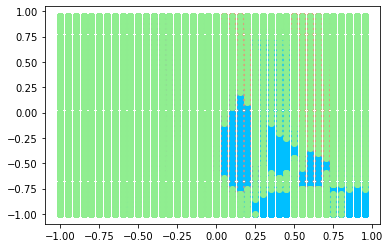

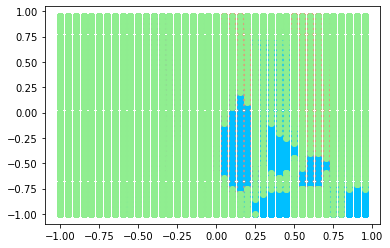

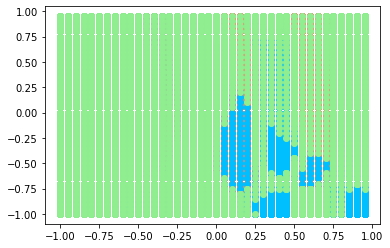

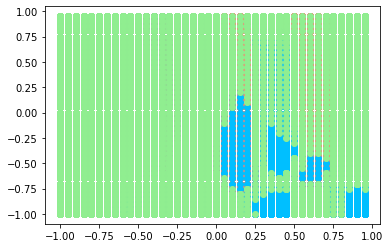

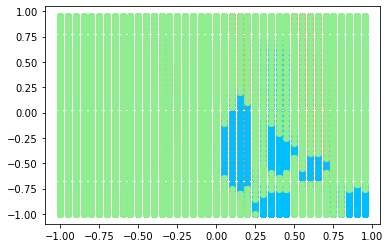

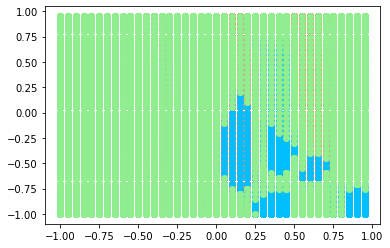

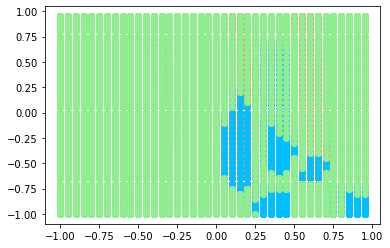

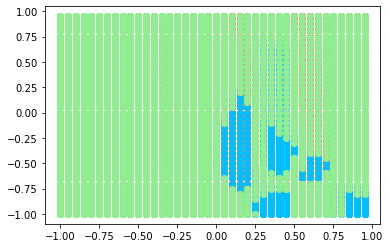

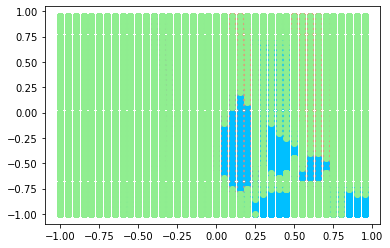

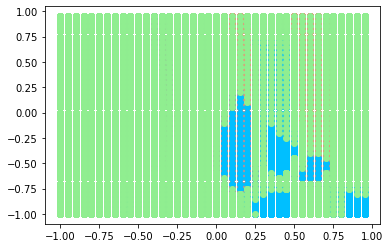

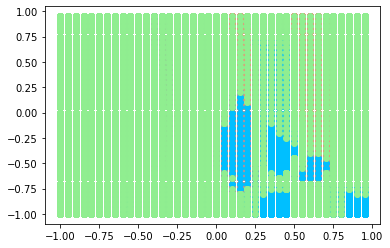

In [6]:
def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count
    
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 5
input_count = 2
hidden_count = 6
output_count = 3

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
points_x1_green = []
points_x2_green = []


for _ in range(0, 20):
    for i in np.arange(-1.0, 1.0, 0.05):
        for j in np.arange(-1.0, 1.0, 0.05):
            value = r.predict_nn(nn, np.array([i, j], float), True, output_count).tolist()
            idx = index(value)
            if idx == 0:
                points_x1_blue.append(i)
                points_x2_blue.append(j)
            elif idx == 1:
                points_x1_red.append(i)
                points_x2_red.append(j)
            elif idx == 2:
                points_x1_green.append(i)
                points_x2_green.append(j)
    
#     print(_)

    r.train_nn(nn, XF, YF, 100, 0.03, True)

    plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
    plt.scatter(points_x1_red, points_x2_red, c=color_2)
    plt.scatter(points_x1_green, points_x2_green, c=color_3)
    
    
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()

r.release_nn(nn)

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [14]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

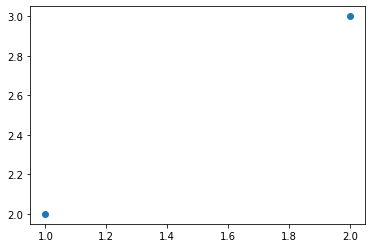

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [16]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

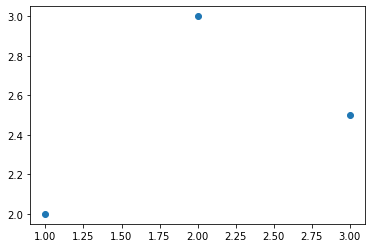

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [18]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

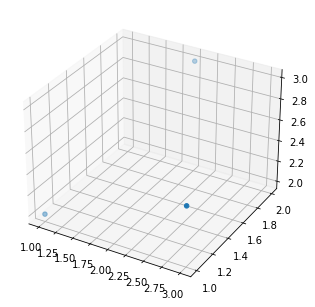

<Figure size 432x288 with 0 Axes>

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [20]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

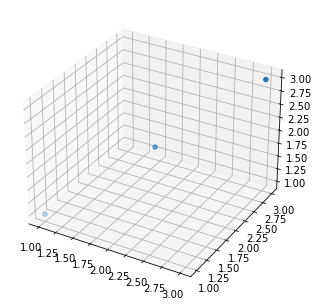

<Figure size 432x288 with 0 Axes>

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [22]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

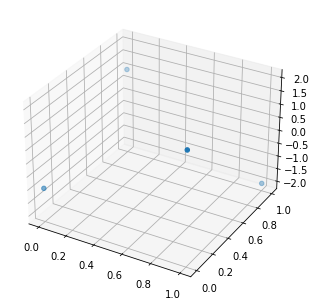

<Figure size 432x288 with 0 Axes>

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()